In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import joblib

In [3]:
import glob

In [4]:
fns = glob.glob('/home/gjones/2016-04-09*.pkl')
fns.sort()
print fns

['/home/gjones/2016-04-09_103326_scan_lo_1010.0_MHz_mmw_modulated_7_7_turns.nc_resonators.pkl', '/home/gjones/2016-04-09_110509_scan_lo_1200.0_MHz_mmw_modulated_7_7_turns.nc_resonators.pkl', '/home/gjones/2016-04-09_113707_scan_lo_1390.0_MHz_mmw_modulated_7_7_turns.nc_resonators.pkl', '/home/gjones/2016-04-09_120915_scan_lo_1580.0_MHz_mmw_modulated_7_7_turns.nc_resonators.pkl', '/home/gjones/2016-04-09_123755_scan_lo_1770.0_MHz_mmw_modulated_7_7_turns.nc_resonators.pkl', '/home/gjones/2016-04-09_130849_scan_lo_1960.0_MHz_mmw_modulated_7_7_turns.nc_resonators.pkl']


In [5]:
alldata = [joblib.load(fn) for fn in fns]

In [6]:
len(alldata)

6

In [15]:
resonators = [data['results'] for data in alldata]

In [9]:
import itertools

In [16]:
resonators = list(itertools.chain.from_iterable(resonators))

In [17]:
len(resonators)

87

In [18]:
resonators[0]

Parameters([('delay',
             <Parameter 'delay', -1.0214734516365003e-08, bounds=[-inf:inf]>),
            ('phi',
             <Parameter 'phi', -2.1693440165962028, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=1118500000.0 (fixed), bounds=[-inf:inf]>),
            ('A_mag', <Parameter 'A_mag', 62.595015826681468, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', 3.6132139667560014e-09, bounds=[-inf:inf]>),
            ('f_0',
             <Parameter 'f_0', 1119076735.11289, bounds=[1118500000.0:1119492187.5]>),
            ('Q',
             <Parameter 'Q', 36818.894797513873, bounds=[112.78897637795276:143242.0]>),
            ('Q_e_real',
             <Parameter 'Q_e_real', 54958.507724538198, bounds=[1:10000000.0]>),
            ('Q_e_imag',
             <Parameter 'Q_e_imag', -11673.857110768557, bounds=[-10000000.0:10000000.0]>)])

In [57]:
def remove_duplicates(resonators,tolerance=1e5):
    clean = []
    f0s = []
    for p in resonators:
        f0 = p['f_0'].value
        if len(clean) == 0:
            clean.append(p)
            f0s.append(f0)
            continue
        distance = np.abs(f0-np.array(f0s))
        if not np.any(distance < tolerance):
            clean.append(p)
            f0s.append(f0)
        else:
            print "found duplicate of ", f0, "distance", distance.min()

    return clean

In [58]:
resonators = remove_duplicates(resonators)

In [59]:
len(resonators)

62

In [39]:
f0s = np.array([p['f_0'].value for p in resonators])

In [25]:
dset = list(itertools.chain.from_iterable([data['data'] for data in alldata]))

In [29]:
freq = np.concatenate([fse[0] for fse in dset])
s21 = np.concatenate([fse[1] for fse in dset])

<IPython.core.display.Javascript object>


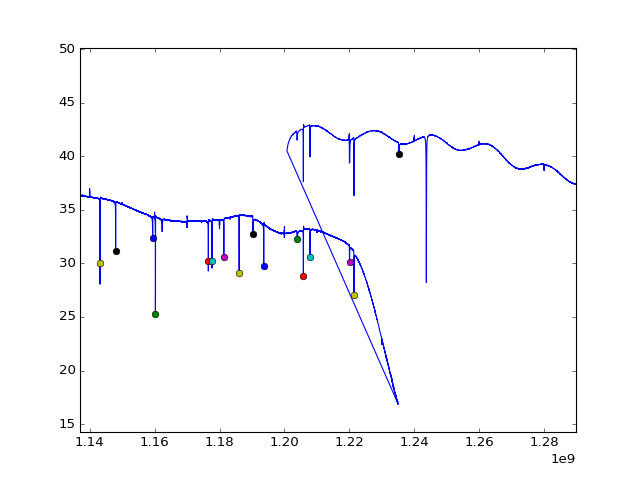

In [71]:
plot(freq,20*np.log10(np.abs(s21)))
for f0 in f0s:
    idx = np.abs(freq-f0).argmin()
    plot(freq[idx],20*np.log10(np.abs(s21[idx])),'o')

In [ ]:
missing = np.array([1162.33e6,
                   1243.71e6,
                    1366.11e6,
                    1623.02e6,
                    1720.7e6, # small
                   ])

In [40]:
bad = np.array([1280e6,
               1344.03e6, 1420e6,
                1536.29e6, # is real but very shallow
                ])
bad = np.hstack((bad,f0s[(f0s>1790e6)&(f0s<1800e6)],f0s[(f0s>1978e6)&(f0s<1991e6)],f0s[f0s>2000e6]))
#all of 1790 to 1800 is bad
# 1978 to 1991
#everything above 2000

In [60]:
bad_resonators = []
good_resonators = []
for p in resonators:
    f0 = p['f_0'].value
    if np.any(np.abs(bad-f0) < 1e6):
        bad_resonators.append(p)
    else:
        good_resonators.append(p)

In [61]:
len(good_resonators)

42

In [69]:
f0s = np.array([p['f_0'].value for p in good_resonators])
Qs = np.array([p['Q'].value for p in good_resonators])
order = f0s.argsort()
f0s = f0s[order]
Qs = Qs[order]

<IPython.core.display.Javascript object>


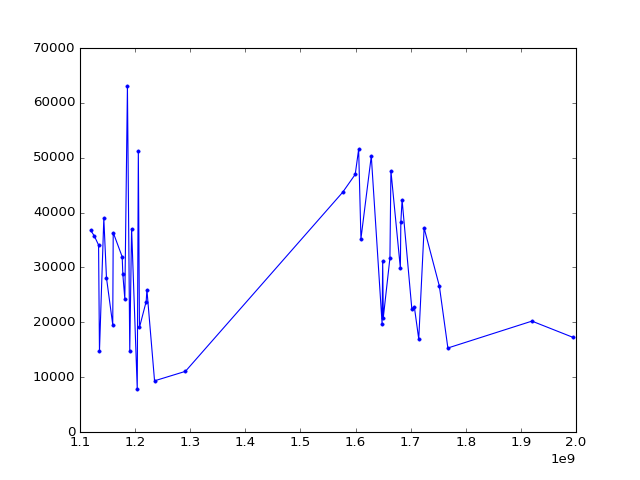

In [70]:
plot(f0s,Qs,'.-')

In [68]:
np.diff(f0s/1e6)

array([   6.93866309,    7.68591934,    1.61113673,    7.90331315,
          4.80120639,   11.40089504,    0.85156891,   16.29803582,
          1.14101251,    3.6288019 ,    4.71743564,    4.23636356,
          3.33072253,   10.25574946,    1.96166373,    2.04123889,
         12.17240077,    1.36085094,   13.85242309,   56.03383836,
        285.37972253,   22.72524357,    6.20009437,    4.16917999,
         18.7706257 ,   19.63053534,    1.05236907,    1.13800727,
         12.01270289,    1.79220713,   17.11460053,    0.88824501,
          2.27120229,   17.63733196,    4.71431657,    7.86411802,
          9.73890756,   27.65648989,   15.45921837,  152.53996041,
         74.75610645])

In [72]:
f0s/1e6

array([ 1119.07673511,  1126.0153982 ,  1133.70131753,  1135.31245427,
        1143.21576741,  1148.0169738 ,  1159.41786884,  1160.26943775,
        1176.56747357,  1177.70848608,  1181.33728799,  1186.05472363,
        1190.29108718,  1193.62180971,  1203.87755917,  1205.8392229 ,
        1207.88046178,  1220.05286255,  1221.41371349,  1235.26613658,
        1291.29997494,  1576.67969747,  1599.40494104,  1605.60503541,
        1609.7742154 ,  1628.5448411 ,  1648.17537644,  1649.22774551,
        1650.36575278,  1662.37845567,  1664.1706628 ,  1681.28526333,
        1682.17350834,  1684.44471064,  1702.0820426 ,  1706.79635917,
        1714.66047719,  1724.39938475,  1752.05587464,  1767.515093  ,
        1920.05505342,  1994.81115987])

In [73]:
low_group = np.array([ 1119.07673511,  1126.0153982 ,  1133.70131753,  1135.31245427,
        1143.21576741,  1148.0169738 ,  1159.41786884,  1160.26943775, 1162.33,
        1176.56747357,  1177.70848608,  1181.33728799,  1186.05472363,
        1190.29108718,  1193.62180971,  1203.87755917,  1205.8392229 ,
        1207.88046178,  1220.05286255,  1221.41371349,  1235.26613658, 1243.71])

high_group = np.array([1576.67969747,  1599.40494104,  1605.60503541,
        1609.7742154 ,
        1623.02,
                       1628.5448411 ,  1648.17537644,  1649.22774551,
        1650.36575278,  1662.37845567,  1664.1706628 ,  1681.28526333,
        1682.17350834,  1684.44471064,  1702.0820426 ,  1706.79635917,
        1714.66047719,  
                       1720.7, 1724.39938475,  1752.05587464,  1767.515093])

In [74]:
low_group.shape

(22,)

In [75]:
high_group.shape

(21,)

In [81]:
np.add.outer(np.arange(10),np.arange(3)).shape

(10, 3)

In [78]:
nsamp = 2**16
step = 1
nstep = 48
f0binned = np.round(f0s * nsamp / 512.0) * 512.0 / nsamp
offset_bins = np.arange(-(nstep + 1), (nstep + 1)) * step

offsets = offset_bins * 512.0 / nsamp

In [79]:
offsets

array([-0.3828125, -0.375    , -0.3671875, -0.359375 , -0.3515625,
       -0.34375  , -0.3359375, -0.328125 , -0.3203125, -0.3125   ,
       -0.3046875, -0.296875 , -0.2890625, -0.28125  , -0.2734375,
       -0.265625 , -0.2578125, -0.25     , -0.2421875, -0.234375 ,
       -0.2265625, -0.21875  , -0.2109375, -0.203125 , -0.1953125,
       -0.1875   , -0.1796875, -0.171875 , -0.1640625, -0.15625  ,
       -0.1484375, -0.140625 , -0.1328125, -0.125    , -0.1171875,
       -0.109375 , -0.1015625, -0.09375  , -0.0859375, -0.078125 ,
       -0.0703125, -0.0625   , -0.0546875, -0.046875 , -0.0390625,
       -0.03125  , -0.0234375, -0.015625 , -0.0078125,  0.       ,
        0.0078125,  0.015625 ,  0.0234375,  0.03125  ,  0.0390625,
        0.046875 ,  0.0546875,  0.0625   ,  0.0703125,  0.078125 ,
        0.0859375,  0.09375  ,  0.1015625,  0.109375 ,  0.1171875,
        0.125    ,  0.1328125,  0.140625 ,  0.1484375,  0.15625  ,
        0.1640625,  0.171875 ,  0.1796875,  0.1875   ,  0.1953